# 第5章: 係り受け解析
https://nlp100.github.io/ja/ch05.html

[日本語Wikipedia](https://ja.wikipedia.org/)の「[人工知能](https://ja.wikipedia.org/wiki/人工知能)」に関する記事からテキスト部分を抜き出したファイルが[ai.ja.zip](https://nlp100.github.io/data/ai.ja.zip)に収録されている． この文章を[CaboCha](https://taku910.github.io/cabocha/)や[KNP](http://nlp.ist.i.kyoto-u.ac.jp/index.php?KNP)等のツールを利用して係り受け解析を行い，その結果をai.ja.txt.parsedというファイルに保存せよ．このファイルを読み込み，以下の問に対応するプログラムを実装せよ．

In [11]:
# !wget https://nlp100.github.io/data/ai.ja.zip && unzip ai.ja.zip && rm ai.ja.zip && mv *ai.ja* ../dataset/
# !cabocha -f1 < ../dataset/ai.ja.txt > ai.ja.txt.parsed

## 40. 係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [34]:
class Morph():
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
    
    def __str__(self):
        return ':'.join([self.surface, self.base, self.pos, self.pos1])

    def __repr__(self):
        return self.__str__()

def get_morph(line):
    surface, content = line.split('\t')
    content = content.split(',')
    base, pos, pos1 = content[6], content[0], content[1]
    return Morph(surface, base, pos, pos1)

with open('ai.ja.txt.parsed', 'r') as f:
    lines = f.readlines()

# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
morph_list = []
for line in lines:
    line = line.strip()
    if line == 'EOS' or line[0] == '*':
        continue

    morph = get_morph(line)
    morph_list += [morph]

print(morph_list[:10])
    



[人工:人工:名詞:一般, 知能:知能:名詞:一般, 人工:人工:名詞:一般, 知能:知能:名詞:一般, （:（:記号:括弧開, じん:じん:名詞:一般, こうち:こうち:名詞:一般, のう:のう:助詞:終助詞, 、:、:記号:読点, 、:、:記号:読点]


## 41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．


In [190]:
class Chunk():
    def __init__(self, morphs, dst, srcs):
        self.morphs = morphs
        self.dst = dst
        self.srcs = srcs
    
    # 指定した品詞が文節に存在するか
    def is_exist_pos(self, pos):
        return '名詞' in [morph.pos for morph in self.morphs]

    def get_surfaces_str(self):
        return ''.join([morph.surface for morph in self.morphs])
    
    def __str__(self):
        return f'{self.morphs}:{self.dst}:{self.srcs}'

    def __repr__(self):
        return self.__str__()

def init_chunks(max_len=500):
    return [Chunk([], -1, []) for _ in range(max_len)]

chunks_list = [] # この配列の長さが文数, 1chunkで1文
chunks = init_chunks() # 最大文節は500とする

for line in lines:
    line = line.strip()
    if line[0] == '*':
        src = int(line.split(' ')[1])
        dst = int(line.split(' ')[2][:-1])
        chunks[src].dst = dst
        chunks[dst].srcs += [src]
    elif line == 'EOS':
        # EOSが２回続いた場合があるのでそれを除去
        if len(chunks[0].morphs) != 0:
            chunks_list += [chunks[:src+1]]
        chunks = init_chunks()
    else:
        chunks[src].morphs += [get_morph(line)]

chunks_list[1]


[[人工:人工:名詞:一般, 知能:知能:名詞:一般]:17:[],
 [（:（:記号:括弧開, じん:じん:名詞:一般, こうち:こうち:名詞:一般, のう:のう:助詞:終助詞, 、:、:記号:読点, 、:、:記号:読点]:17:[],
 [AI:*:名詞:一般]:3:[],
 [〈:〈:記号:括弧開, エーアイ:*:名詞:固有名詞, 〉:〉:記号:括弧閉, ）:）:記号:括弧閉, と:と:助詞:格助詞, は:は:助詞:係助詞, 、:、:記号:読点]:17:[2],
 [「:「:記号:括弧開, 『:『:記号:括弧開, 計算:計算:名詞:サ変接続]:5:[],
 [（:（:記号:括弧開, ）:）:記号:括弧閉, 』:』:記号:括弧閉, という:という:助詞:格助詞]:9:[4],
 [概念:概念:名詞:一般, と:と:助詞:並立助詞]:9:[],
 [『:『:記号:括弧開, コンピュータ:コンピュータ:名詞:一般]:8:[],
 [（:（:記号:括弧開, ）:）:記号:括弧閉, 』:』:記号:括弧閉, という:という:助詞:格助詞]:9:[7],
 [道具:道具:名詞:一般, を:を:助詞:格助詞]:10:[5, 6, 8],
 [用い:用いる:動詞:自立, て:て:助詞:接続助詞]:12:[9],
 [『:『:記号:括弧開, 知能:知能:名詞:一般, 』:』:記号:括弧閉, を:を:助詞:格助詞]:12:[],
 [研究:研究:名詞:サ変接続, する:する:動詞:自立]:13:[10, 11],
 [計算:計算:名詞:サ変接続, 機:機:名詞:接尾, 科学:科学:名詞:一般]:14:[12],
 [（:（:記号:括弧開, ）:）:記号:括弧閉, の:の:助詞:連体化]:15:[13],
 [一:一:名詞:数, 分野:分野:名詞:一般, 」:」:記号:括弧閉, を:を:助詞:格助詞]:16:[14],
 [指す:指す:動詞:自立]:17:[15],
 [語:語:名詞:一般, 。:。:記号:句点]:34:[0, 1, 3, 16],
 [「:「:記号:括弧開, 言語:言語:名詞:一般, の:の:助詞:連体化]:20:[],
 [理解:理解:名詞:サ変接続, や:や:助詞:並立助詞]:20:[],
 [推論:推論:名詞:サ変接続, 、:、:記号:読点]:21:[18, 

## 42. 係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．


In [76]:
for chunks in chunks_list[:5]:
    for chunk_src in chunks:
        if chunk_src.dst != -1:
            chunk_dst = chunks[chunk_src.dst]
            word_src = ''.join([morph.surface for morph in chunk_src.morphs if morph.pos != '記号'])
            word_dst = ''.join([morph.surface for morph in chunk_dst.morphs if morph.pos != '記号'])
            print(word_src, word_dst)

人工知能 語
じんこうちのう 語
AI エーアイとは
エーアイとは 語
計算 という
という 道具を
概念と 道具を
コンピュータ という
という 道具を
道具を 用いて
用いて 研究する
知能を 研究する
研究する 計算機科学
計算機科学 の
の 一分野を
一分野を 指す
指す 語
語 研究分野とも
言語の 推論
理解や 推論
推論 問題解決などの
問題解決などの 知的行動を
知的行動を 代わって
人間に 代わって
代わって 行わせる
コンピューターに 行わせる
行わせる 技術または
技術または 研究分野とも
計算機 コンピュータによる
コンピュータによる 情報処理システムの
知的な 情報処理システムの
情報処理システムの 実現に関する
設計や 実現に関する
実現に関する 研究分野とも
研究分野とも される
日本大百科全書(ニッポニカ)』の 解説で
解説で 述べている
情報工学者通信工学者の 佐藤理史は
佐藤理史は 述べている
次のように 述べている
人間の 知的能力を
知的能力を 実現する
コンピュータ上で 実現する
実現する 技術ソフトウェアコンピュータシステム
様々な 技術ソフトウェアコンピュータシステム
技術ソフトウェアコンピュータシステム ある
応用例は ある
自然言語処理 機械翻訳かな漢字変換構文解析等
機械翻訳かな漢字変換構文解析等 専門家の
専門家の 推論判断を
推論判断を 模倣する
模倣する エキスパートシステム
エキスパートシステム 画像認識等が
画像データを 解析して
解析して 検出抽出したりする
特定の パターンを
パターンを 検出抽出したりする
検出抽出したりする 画像認識等が
画像認識等が ある
ある 命名された
1956年に 命名された
ダートマス会議で 命名された
ジョンマッカーシーにより 命名された
命名された 使われている
現在では 使われている
記号処理を 用いた
用いた 知能の
知能の 記述を
記述を する
主体と する
する 研究での
情報処理や 研究での
研究での アプローチという
アプローチという 意味あいでも
意味あいでも 使われている
使われている ある
家庭用電気機械器具の 制御システムや
制御システムや 思考ルーチンも
ゲームソフトの 思考ルーチンも
思考ルーチンも 呼ばれる
こう 呼ばれる
呼ばれる ことも


## 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．


In [78]:
for chunks in chunks_list[:5]:
    for chunk_src in chunks:
        if chunk_src.dst == -1:
            continue
        chunk_dst = chunks[chunk_src.dst]
        if '名詞' in [morph.pos for morph in chunk_src.morphs] and '動詞' in [morph.pos for morph in chunk_dst.morphs]:
            word_src = ''.join([morph.surface for morph in chunk_src.morphs if morph.pos != '記号'])
            word_dst = ''.join([morph.surface for morph in chunk_dst.morphs if morph.pos != '記号'])
            print(word_src, word_dst)

道具を 用いて
知能を 研究する
一分野を 指す
知的行動を 代わって
人間に 代わって
コンピューターに 行わせる
研究分野とも される
解説で 述べている
佐藤理史は 述べている
次のように 述べている
知的能力を 実現する
コンピュータ上で 実現する
技術ソフトウェアコンピュータシステム ある
応用例は ある
推論判断を 模倣する
画像データを 解析して
解析して 検出抽出したりする
パターンを 検出抽出したりする
画像認識等が ある
1956年に 命名された
ダートマス会議で 命名された
ジョンマッカーシーにより 命名された
命名された 使われている
現在では 使われている
記号処理を 用いた
記述を する
主体と する
意味あいでも 使われている
思考ルーチンも 呼ばれる
ことも ある
カウンセラーを 模倣した
プログラム 出されるが
人工無脳が 出されるが
引き合いに 出されるが
計算機に させようという
役割を させようという
エキスパートシステムと 呼ばれる
実現は 困難視されている
人間が 持つ
暗黙に 持つ
記述が なり
問題と なり
利用が 困難視されている
困難視されている ある
アプローチとしては 知られているが
アプローチも 知られているが
差は ある
記号的明示性に ある
その後 集めた
サポートベクターマシンが 集めた
注目を 集めた
経験を 行う
元に 行う
学習を 行う
手法も ある
宇宙において 実装するという
言葉通り 実装するという
知性を 表現し
機械的に 表現し
表現し 実装するという


## 44. 係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．


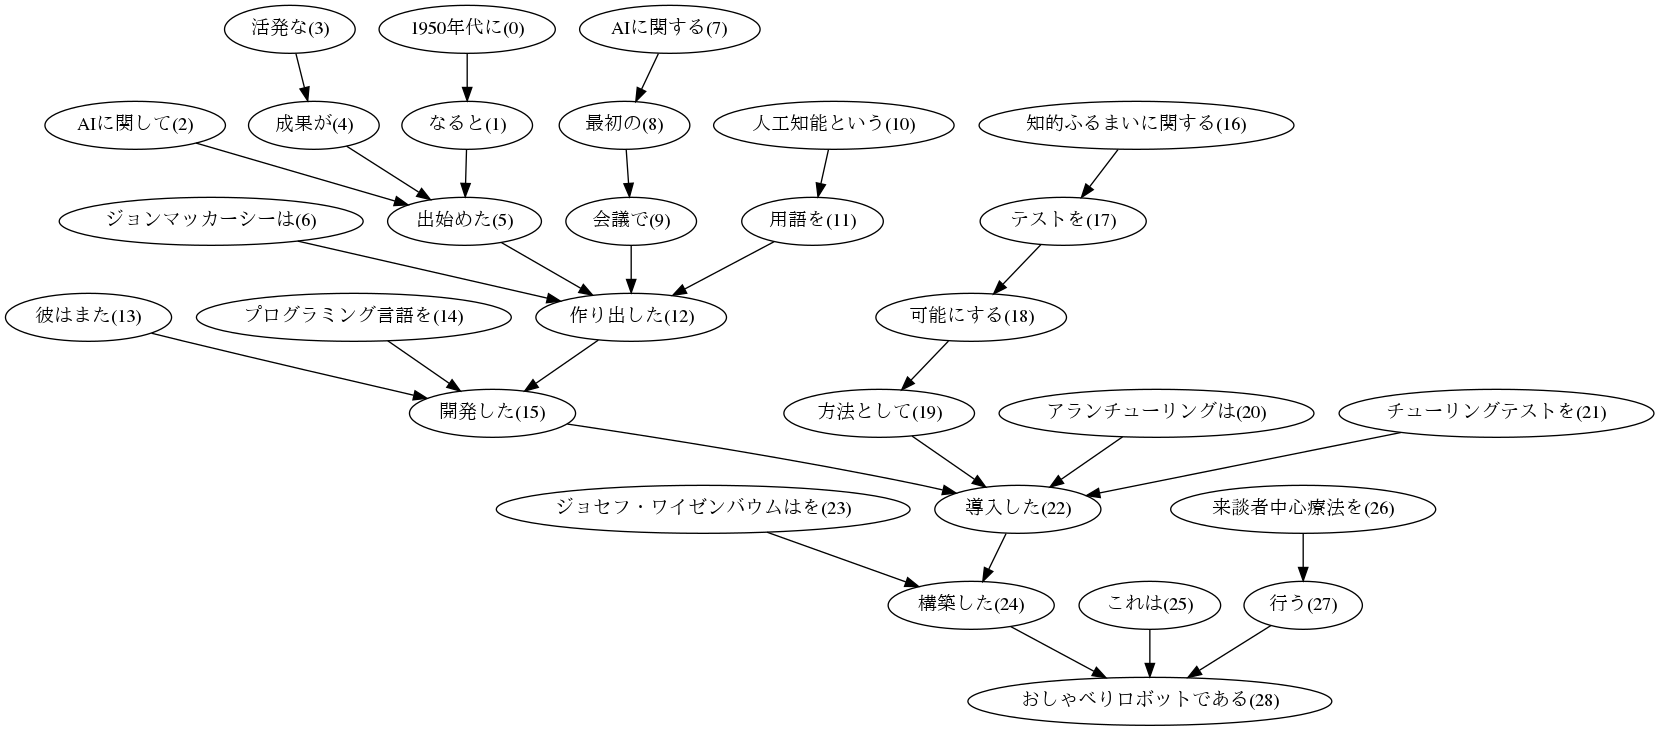

In [146]:
import pydot
from IPython.display import Image

edges = []
chunks = chunks_list[13]
for id, chunk_src in enumerate(chunks):
    if chunk_src.dst != -1:
        chunk_dst = chunks[chunk_src.dst]
        word_src = ''.join([morph.surface for morph in chunk_src.morphs if morph.pos != '記号']) + f'({id})'
        word_dst = ''.join([morph.surface for morph in chunk_dst.morphs if morph.pos != '記号']) + f'({chunk_src.dst})'
        edges += [(word_src, word_dst)]

graph = pydot.graph_from_edges(edges, directed=True)
graph.add_node(pydot.Node('node'))
Image(graph.create_png())


## 45. 動詞の格パターンの抽出
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい．
動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ．
ただし，出力は以下の仕様を満たすようにせよ．

- 動詞を含む文節において，最左の動詞の基本形を述語とする
- 述語に係る助詞を格とする
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

```
作り出す	で は を
```
このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

- コーパス中で頻出する述語と格パターンの組み合わせ
- 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）


In [115]:
with open('answer_45.txt', 'w') as f:
    for chunks in chunks_list:
        for chunk in chunks:
            verb_list = [morph.base for morph in chunk.morphs if morph.pos == '動詞']
            if len(verb_list) == 0:
                continue
            verb = verb_list[0]
            chunk_srcs = [chunks[src] for src in chunk.srcs]
            cases = []
            for chunk_src in chunk_srcs:
                cases += [morph.surface for morph in chunk_src.morphs if morph.pos == '助詞']
            case = ' '.join(set(sorted(cases)))
            print(f"{verb}\t{case}", file=f)
!cat answer_45.txt | sort | uniq -c | sort -nr | head -n 10
!cat answer_45.txt | grep '行う' | sort | uniq -c | sort -nr | head -n 5
!cat answer_45.txt | grep 'なる' | sort | uniq -c | sort -nr | head -n 5
!cat answer_45.txt | grep '与える' | sort | uniq -c | sort -nr | head -n 5

用いる	を
する	を て
指す	を
代わる	に を
行う	に て
する	も と
述べる	で は に の
する	で を
する	を
する	を
する	を て
ある	は が
する	で により に
用いる	を
する	を と
使う	で は でも
呼ぶ	も
ある	も て
する	を
出す	に が
する	に を
呼ぶ	と
持つ	に が
なる	と が
する	は が
知る	として も は
ある	に て は が
集める	を が
行う	に を
ある	も
する	に を
する	において
超える	を
する	に て
行く	て により
する	を にかけて
破る	も
する	として に が
なる	で と は など
呼ぶ	と は
ある	が
繰り返す	を
する	を と
基づく	に
する	と
ある	として て は が
する	を
作る	を
なす	も
する	で に は を通して て を
上回る	で を
出す	を
行う	で に は て が
でる	が
する	で て は
だす	で を が
加える	に
見せる	を て は において
広がる	に は が
行う	を
始まる	も て
する	て と
試みる	
なる	て と が
する	と が
する	を は
行う	を は
する	を
もたらす	に を は
する	に
題する	と
する	に を は
築く	を
なる	に
出る	に関して と が
作り出す	で を は
する	を は
ふるまう	
する	を
する	として を は
する	を は
行う	を
行う	に
する	として において
する	として
示す	で は を に
する	を
示す	を て は
する	を は
する	を は
示す	を
呼ぶ	と
ある	も は
する	に を
する	を
使う	に は によって
する	に を は が
上げる	で を は が
する	に
する	に を は
打つ	に を
敗れる	で は に が
する	を において
使う	のに を
省く	によって
上回る	を が
する	を は
する	に が
する	で も は
する	に が
する	に は が
適す	に
する	を に対して から
行う	を
する	が
行う	に により を
する	が
する	に を
行う	に て を
する	に を
する	を
含む	に も は
する	
分かる	が から
する	に が
見合う	に
見出せる	が
する	は にとって も て から が
する	に において は が
進

## 46. 動詞の格フレーム情報の抽出
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

- 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
- 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

```
作り出す	で は を	会議で ジョンマッカーシーは 用語を
```

In [123]:
for chunks in chunks_list:
    for chunk in chunks:
        verb_list = [morph.base for morph in chunk.morphs if morph.pos == '動詞']
        if len(verb_list) == 0:
            continue
        verb = verb_list[0]
        chunk_srcs = [chunks[src] for src in chunk.srcs]
        cases = []
        words = []
        for chunk_src in chunk_srcs:
            cases += [morph.surface for morph in chunk_src.morphs if morph.pos == '助詞']
            words += [''.join([morph.surface for morph in chunk_src.morphs if morph.pos != '記号'])]
        case = ' '.join(set(sorted(cases)))
        word = ' '.join(words)
        print(f"{verb}\t{case}\t{word}")


用いる	を	道具を
する	を て	用いて 知能を
指す	を	一分野を
代わる	に を	知的行動を 人間に
行う	に て	代わって コンピューターに
する	も と	研究分野とも
述べる	で は に の	解説で 佐藤理史は 次のように
する	で を	知的能力を コンピュータ上で
する	を	推論判断を
する	を	画像データを
する	を て	解析して パターンを
ある	は が	技術ソフトウェアコンピュータシステム 応用例は 画像認識等が
する	で により に	ある 1956年に ダートマス会議で ジョンマッカーシーにより
用いる	を	記号処理を
する	を と	記述を 主体と
使う	で は でも	命名された 現在では 意味あいでも
呼ぶ	も	思考ルーチンも こう
ある	も て	使われている ことも
する	を	カウンセラーを
出す	に が	プログラム 人工無脳が しばしば 引き合いに
する	に を	計算機に 役割を
呼ぶ	と	エキスパートシステムと
持つ	に が	人間が 暗黙に
なる	と が	記述が 問題と
する	は が	出されるが 実現は なり 利用が
知る	として も は	アプローチとしては アプローチも
ある	に て は が	困難視されている 知られているが 差は 記号的明示性に
集める	を が	ある その後 サポートベクターマシンが 注目を
行う	に を	経験を 元に 学習を
ある	も	集めた また 手法も
する	に を	知性を 機械的に
する	において	宇宙において 言葉通り 表現し
超える	を	流行を
する	に て	超えて 社会に
行く	て により	登場により 浸透して
する	を にかけて	2017年にかけて ディープラーニングを
破る	も	プレイヤーも
する	として に が	MicrosoftSuphx(SuperPhoenix)」が AIとして 初めて 十段に
なる	で と は など	行った 破り 麻雀では 到達するなど 最先端技術と
呼ぶ	と は	人工知能は 機械学習と
ある	が	呼ばれ ものが
繰り返す	を	学習を
する	を と	ことを 基本と
基づく	に	経験に
する	と	システム 手法であり ソフトコンピューティングと
ある	として て は が	一方 関係している 手法としては ものが
する	を	これらを
作る	を	知的システムを
なす	も	試みも
する


## 47. 機能動詞構文のマイニング

動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

- 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
- 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
- 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．

```
学習を行う	に を	元に 経験を
```


In [132]:
for chunks in chunks_list:
    for chunk in chunks:
        verb_list = [morph.base for morph in chunk.morphs if morph.pos == '動詞']
        if len(verb_list) == 0:
            continue
        verb = verb_list[0]
        
        chunk_srcs = [chunks[src] for src in chunk.srcs]
        cases = []
        words = []
        sahen = None
        for chunk_src in chunk_srcs:
            if 'サ変接続' in [morph.pos1 for morph in chunk_src.morphs] and 'を' in [morph.surface for morph in chunk_src.morphs]:
                sahen = ''.join([morph.surface for morph in chunk_src.morphs if morph.pos != '記号'])
            cases += [morph.surface for morph in chunk_src.morphs if morph.pos == '助詞']
            words += [''.join([morph.surface for morph in chunk_src.morphs if morph.pos != '記号'])]

        if sahen is not None:
            words.remove(sahen)
            cases.remove('を')
            case = ' '.join(set(sorted(cases)))
            word = ' '.join(words)
            print(f"{sahen+verb}\t{case}\t{word}")

知的行動を代わる	に	人間に
推論判断をする		
記号処理を用いる		
記述をする	と	主体と
注目を集める	が	ある その後 サポートベクターマシンが
学習を行う	に を	経験を 元に
流行を超える		
学習を繰り返す		
統計的学習をする	で に は を通して て を	なされている ACT-Rでは 推論ルールを 元に 生成規則を通して
進化を見せる	て は において	活躍している 特に 敵対的生成ネットワークは 加えて 生成技術において
コンテンツ生成を行う		
機械式計算機をする	は	機械論 ブレーズ・パスカルは 1642年
開発を行う	は	製作した エイダ・ラブレスは
プログラミング言語をする	は	作り出した 彼はまた
テストをする		
来談者中心療法を行う		
プログラミング言語をする	は	示した 示し アランカルメラウアーは
バックギャモン専用コンピュータTDギャモンをする	に は	1992年に IBMは
投資全額を上回る	が	使い コストが
意味付けをする	に対して から	ここから 非構造化データに対して
処理を行う		適用し
知的処理を行う	に により	同年に ティム・バーナーズリーにより Webに
意味をする	に	データに
知的処理を行う	に て	付加して コンピュータに
研究を進める	て	費やして
命令をする	で	直接 機構で
運転をする	に	増やし 元に
特許をする	に まで が	2018年までに 日本が
研究をする		
運転をする	に て	基づいて 柔軟に
注目を集める	は から	世界初であった ことから ファジィは 関わらず
ニューロファジィ制御をする		
成功を受ける		
知的制御を用いる	も て	受けて 他社も
開発工数を抑える		
制御をする	から	少なさから 多少
知的制御をする		
表現するをする		
進歩を担う		
精度改善を果たす	で に が	2012年に 画像処理コンテストで チームが
専用プログラムを使う		
研究を続ける	て が	ジェフホーキンスが 向けて
行動型システムを用いる	て は	登場している これは ものではなく
関連性を導き出す		
ワンショット学習をする	が	データが
認識能力を持つ		
記号接地問題(シンボルグラウンディング問題)をする	に は	開発 8月には
注目を集める	に	急速に
普及を受ける		


## 48. 名詞から根へのパスの抽出
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

- 各文節は（表層形の）形態素列で表現する
- パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

```
ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出した
```

KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．

```
ジョンマッカーシーは -> 作り出した
ＡＩに -> 関する -> 会議で -> 作り出した
会議で -> 作り出した
人工知能と -> いう -> 用語を -> 作り出した
用語を -> 作り出した
```


In [177]:
chunks = chunks_list[13]
for chunk in chunks:
    if not chunk.is_exist_pos('名詞'):
        continue
    words = []
    while True:
        words += [''.join([morph.surface for morph in chunk.morphs if morph.pos != '記号'])]
        
        if chunk.dst == -1:
            break
        chunk = chunks[chunk.dst]
    print(' -> '.join(words))

1950年代に -> なると -> 出始めた -> 作り出した -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
AIに関して -> 出始めた -> 作り出した -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
活発な -> 成果が -> 出始めた -> 作り出した -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
成果が -> 出始めた -> 作り出した -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
ジョンマッカーシーは -> 作り出した -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
AIに関する -> 最初の -> 会議で -> 作り出した -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
最初の -> 会議で -> 作り出した -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
会議で -> 作り出した -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
人工知能という -> 用語を -> 作り出した -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
用語を -> 作り出した -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
彼はまた -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
プログラミング言語を -> 開発した -> 導入した -> 構築した -> おしゃべりロボットである
開発した -> 導入した -> 構築した -> おしゃべりロボットである
知的ふるまいに関する -> テストを -> 可能にする -> 方法として -> 導入した -> 構築した -> おしゃべりロボットである
テストを -> 可能にする -> 方法として -> 導入した -> 構築した -> おしゃべりロボットである
可能にする -> 方法として -> 導入した -> 構築した -> おしゃべりロボットである
方法として -> 導入した -> 構築した -> おしゃべりロボットである
アランチューリングは -> 導入した -> 構築した -> おしゃ

## 49. 名詞間の係り受けパスの抽出
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がiとj（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．

- 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
- 文節iとjに含まれる名詞句はそれぞれ，XとYに置換する

また，係り受けパスの形状は，以下の2通りが考えられる．

- 文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
- 上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

```
Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを
```

KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．

```
Xは | Yに -> 関する -> 会議で | 作り出した。
Xは | Yで | 作り出した。
Xは | Yと -> いう -> 用語を | 作り出した。
Xは | Yを | 作り出した。
Xに -> 関する -> Yで
Xに -> 関する -> 会議で | Yと -> いう -> 用語を | 作り出した。
Xに -> 関する -> 会議で | Yを | 作り出した。
Xで | Yと -> いう -> 用語を | 作り出した。
Xで | Yを | 作り出した。
Xと -> いう -> Yを
```

In [202]:
from itertools import combinations

chunks = chunks_list[13]
chunks_noun = [chunk for chunk in chunks if chunk.is_exist_pos('名詞')] # 名詞が含まれてるchunkのリスト
noun_pairs = list(combinations(chunks_noun, 2)) # 名詞節のペア

def get_root_path(chunk_src):
    path = [chunk_src]
    chunk = chunk_src
    while True:
        if chunk.dst == -1:
            break
        chunk = chunks[chunk.dst]
        path += [chunk]
    return path

def change_noun(chunk, chr):
    word = []
    for morph in chunk.morphs:
        if morph.pos == '名詞':
            if len(word) != 0 and (word[-1] == chr or word[-1] == '記号'):
                continue
            word += [chr]
        else:
            word += [morph.surface]
    return ''.join(word)

for X, Y in noun_pairs:
    X_path = get_root_path(X)
    Y_path = get_root_path(Y)
    k_chunks = list(set(X_path) & set(Y_path)) # path上で共通のchunk
    # 一番葉に近いところで共通しているchunkをkとする
    if len(k_chunks) == 1:
        k = k_chunks[0]
        k_path = get_root_path(k) # kから根までのpath
    else:
        k = min(filter(lambda x: x.dst != -1, k_chunks), key=lambda x: x.dst)
        k_path = get_root_path(k) # kから根までのpath

    # 根までの経路にYが存在する場合
    if Y_path[0] == k:
        words = [change_noun(X_path[0], 'X')]
        for chunk in X_path[1:]:
            if chunk == Y:
                break
            words += [chunk.get_surfaces_str()]
        words += [change_noun(Y, 'Y')]
        print(' -> '.join(words))
     # 根までの経路にYが存在しない場合
    else:
        X_words = [change_noun(X_path[0], 'X')]
        for chunk in X_path[1:]:
            if chunk == k:
                break
            X_words += [chunk.get_surfaces_str()]
        
        Y_words = [change_noun(Y_path[0], 'Y')]
        for chunk in Y_path[1:]:
            if chunk == k:
                break
            Y_words += [chunk.get_surfaces_str()]
        
        k_words = []
        for chunk in k_path:
            k_words += [chunk.get_surfaces_str()]
        

        print(f"{' -> '.join(X_words)} | {' -> '.join(Y_words)} | {' -> '.join(k_words)}")

    

Xに -> なると | Yに関して | 出始めた。 -> 作り出した。 -> 開発した。 -> 導入した。 -> 構築した。 -> おしゃべりロボットである。
Xに -> なると | Yな -> 成果が | 出始めた。 -> 作り出した。 -> 開発した。 -> 導入した。 -> 構築した。 -> おしゃべりロボットである。
Xに -> なると | Yが | 出始めた。 -> 作り出した。 -> 開発した。 -> 導入した。 -> 構築した。 -> おしゃべりロボットである。
Xに -> なると -> 出始めた。 | Y・Yは | 作り出した。 -> 開発した。 -> 導入した。 -> 構築した。 -> おしゃべりロボットである。
Xに -> なると -> 出始めた。 | Yに関する -> 最初の -> 会議で | 作り出した。 -> 開発した。 -> 導入した。 -> 構築した。 -> おしゃべりロボットである。
Xに -> なると -> 出始めた。 | Yの -> 会議で | 作り出した。 -> 開発した。 -> 導入した。 -> 構築した。 -> おしゃべりロボットである。
Xに -> なると -> 出始めた。 | Yで | 作り出した。 -> 開発した。 -> 導入した。 -> 構築した。 -> おしゃべりロボットである。
Xに -> なると -> 出始めた。 | 「Y」という -> 用語を | 作り出した。 -> 開発した。 -> 導入した。 -> 構築した。 -> おしゃべりロボットである。
Xに -> なると -> 出始めた。 | Yを | 作り出した。 -> 開発した。 -> 導入した。 -> 構築した。 -> おしゃべりロボットである。
Xに -> なると -> 出始めた。 -> 作り出した。 | Yはまた | 開発した。 -> 導入した。 -> 構築した。 -> おしゃべりロボットである。
Xに -> なると -> 出始めた。 -> 作り出した。 | Yを | 開発した。 -> 導入した。 -> 構築した。 -> おしゃべりロボットである。
Xに -> なると -> 出始めた。 -> 作り出した。 -> Yした。
Xに -> なると -> 出始めた。 -> 作り出した。 -> 開発した。 | Yふるまいに関する -> テストを -> 可能にする 